In [4]:
# load numerical packages
from __future__ import division
import numpy as np 
import scipy as sp
import math
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerLine2D
#import seaborn as sns
import pandas as pd
from ipywidgets import interact, fixed 
%matplotlib inline


np.set_printoptions(threshold=np.inf)

In [5]:
# RMSE functions
# Root mean squared error
    # Input D and Y as column matrices

def RMSE(D, Y):
    [m,n] = D.shape
    E = np.subtract(D,Y)
    E2 = np.square(E)
    E2_sum = np.sum(E2)
    rmse = (1/m)*E2_sum
    rmse = np.sqrt(rmse)
    return rmse;

In [6]:
# Read in Data (excel file)

raw_data_df = pd.read_excel("C:/Users/tbesas/Documents/0 School/01 Spring 2017/04 EE496/Data/Air Quality Data/AirQualityUCI/AirQualityUCI.xlsx")
raw_data_df.head()
# print(raw_data_df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
df_raw = raw_data_df.loc[:, ['CO(GT)','PT08.S1(CO)', 'T', 'RH', 'AH']]
df_2014 = df_raw
df_2014.columns = ['CO','PT0', 'Temp', 'RH', 'AH']

df_2014.head()

,CO,PT0,Temp,RH,AH
0,2.6,1360.00,13.60,48.875001,0.757754
1,2.0,1292.25,13.30,47.700000,0.725487
2,2.2,1402.00,11.90,53.975000,0.750239
3,2.2,1375.50,11.00,60.000000,0.786713
4,1.6,1272.25,11.15,59.575001,0.788794


In [8]:
print(np.shape(df_2014))
[N,L] = np.shape(df_2014)
print(N)

(9357, 5)
9357


In [9]:
# Case where the data is re-indexed to remove gaps when -200 is taken out 
#labels = ['CO','PT0','Temp', 'RH', 'AH']

#df_2014 = df_2014[df_2014.CO != -200]
#df_2014 = df_2014[df_2014.PT0 != -200]
#df_2014 = df_2014[df_2014.Temp != -200]
#df_2014 = df_2014[df_2014.RH != -200]
#df_2014 = df_2014[df_2014.AH != -200]
#df = np.asarray(df_2014.values)
#df = pd.DataFrame(df, columns = labels)       
## print(df)
## df.head()


In [10]:
df_2014 = df_2014.replace(-200, 0)


print(np.shape(df_2014))
[N,L] = np.shape(df_2014)
print(N)
print(df_2014)

(9357, 5)
9357
       CO          PT0       Temp         RH        AH
0     2.6  1360.000000  13.600000  48.875001  0.757754
1     2.0  1292.250000  13.300000  47.700000  0.725487
2     2.2  1402.000000  11.900000  53.975000  0.750239
3     2.2  1375.500000  11.000000  60.000000  0.786713
4     1.6  1272.250000  11.150000  59.575001  0.788794
5     1.2  1197.000000  11.175000  59.175000  0.784772
6     1.2  1185.000000  11.325000  56.775000  0.760312
7     1.0  1136.250000  10.675000  60.000000  0.770238
8     0.9  1094.000000  10.650000  59.674999  0.764819
9     0.6  1009.750000  10.250000  60.200001  0.751657
10    0.0  1011.000000  10.075000  60.474999  0.746495
11    0.7  1066.000000  11.000000  56.175000  0.736560
12    0.7  1051.750000  10.450000  58.125000  0.735295
13    1.1  1144.000000  10.200000  59.599999  0.741736
14    2.0  1333.250000  10.750000  57.425000  0.740795
15    2.2  1351.000000  10.500000  60.599998  0.769111
16    1.7  1233.250000  10.800000  58.350000  0.75

In [11]:
labels = ['CO','PT0','Temp', 'RH', 'AH']

df_2014 = df_2014[df_2014.CO != -200]
df_2014 = df_2014[df_2014.PT0 != -200]
df_2014 = df_2014[df_2014.Temp != -200]
df_2014 = df_2014[df_2014.RH != -200]
df_2014 = df_2014[df_2014.AH != -200]


print(np.shape(df_2014))
[N,L] = np.shape(df_2014)
print(N)


(9357, 5)
9357


In [17]:
print(np.shape(df_2014))
[N,L] = np.shape(df_2014)
print(N)

(9357, 5)
9357


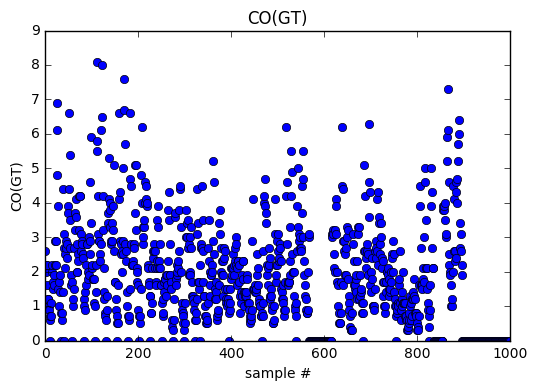

In [18]:
CO = df_2014['CO'].values

plt.plot(CO[0:1000], 'o')
plt.title('CO(GT)')
plt.xlabel('sample #')
plt.ylabel('CO(GT)')
plt.show()


In [19]:
# FINDING CO as a function of PT0, Temp, RH, and AH values


# Desired = CO
CO = df_2014['CO'].values
CO = np.asmatrix(CO).T
print(CO.shape)

# Create X matrix
X = df_2014.loc[:,['PT0','Temp', 'RH', 'AH']].values
X = np.asmatrix(X)
X = X.T
print(X.shape)

# Get Weights
W = np.linalg.pinv(X.T)*CO
print(W)

# Get Prediction
Y = (X.T)*W

(9357, 1)
(4, 9357)
[[ 0.00466855]
 [-0.11680147]
 [-0.04991066]
 [ 1.20971749]]


In [21]:
# Check Errors
Error = RMSE(CO,Y)
print(Error)

1.2097401975
